In [217]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.style.use('seaborn')


In [192]:
url = 'imdb_com_movie_data.csv'
df = pd.read_csv(url)

In [193]:
df.head()

,Uniq Id,Crawl Timestamp,Pageurl,Title,Genres,Release Date,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget,Collection,Collection Date
0,bdce103d6c8ee8206477f5ef43cdd6cf,2019-05-29 12:32:00 +0000,https://www.imdb.com/title/tt6791350/,Guardians of the Galaxy Vol. 3 (2021) - IMDb,NaN,NaN,NaN,NaN,NaN,Directed by James Gunn. With Elizabeth Debicki...,NaN,English,NaN,NaN,NaN,NaN
1,90bd11174adf73475d088f93a2da28da,2019-05-29 12:30:33 +0000,https://www.imdb.com/title/tt1228705/,Iron Man 2 (2010) - IMDb,Action|Adventure|Sci-Fi,7 May 2010 (USA),PG-13,7.0,124 min,Directed by Jon Favreau. With Robert Downey Jr...,Robert Downey Jr.|Mickey Rourke|Gwyneth Paltro...,English|French|Russian,"D.C. Stages, 1360 East 6th Street, Downtown, L...","$200,000,000","$623,933,331,",19 August 2010
2,df6fc7d029a7e5c214509cbfb513d283,2019-05-29 12:31:05 +0000,https://www.imdb.com/title/tt2015381/,Guardians of the Galaxy (2014) - IMDb,Action|Adventure|Comedy|Sci-Fi,1 August 2014 (USA),PG-13,8.1,121 min,"Directed by James Gunn. With Chris Pratt, Vin ...",Chris Pratt|Vin Diesel|Bradley Cooper|Zoe Saldana,English,"Shepperton Studios, Shepperton, Surrey, Englan...","$170,000,000","$774,176,600",NaN
3,4f73f64a1b559ac76448fd9347bca974,2019-05-29 12:31:37 +0000,https://www.imdb.com/title/tt1825683/,Black Panther (2018) - IMDb,Action|Adventure|Sci-Fi,16 February 2018 (USA),PG-13,7.3,134 min,Directed by Ryan Coogler. With Chadwick Bosema...,Chadwick Boseman|Michael B. Jordan|Lupita Nyon...,English|Swahili|Nama|Xhosa|Korean,"Pinewood Atlanta Studios, 461 Sandy Creek Road...","$200,000,000","$1,347,071,259",NaN
4,35ced81a516bc02c3f303015cb7a068f,2019-05-29 12:30:49 +0000,https://www.imdb.com/title/tt1300854/,Iron Man 3 (2013) - IMDb,Action|Adventure|Sci-Fi,3 May 2013 (USA),PG-13,7.2,130 min,Directed by Shane Black. With Robert Downey Jr...,Robert Downey Jr.|Guy Pearce|Gwyneth Paltrow|D...,English,"Cary, North Carolina, USA","$200,000,000","$1,215,439,994",NaN


In [218]:
df.tail()

,Uniq Id,Crawl Timestamp,Pageurl,Title,Genres,Release Date,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget,Collection,Collection Date
19,35fe4557f4bf5da8479885aa4da464f2,2019-05-29 12:31:10 +0000,https://www.imdb.com/title/tt2395427/,Avengers: Age of Ultron (2015) - IMDb,Action|Adventure|Sci-Fi,1 May 2015 (USA),PG-13,7.3,141 min,Directed by Joss Whedon. With Robert Downey Jr...,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,English|Korean,"Shepperton Studios, Shepperton, Surrey, Englan...","$250,000,000","$1,405,413,868",NaN
20,b74afc0a703201c2beba2ccce2ec8f6a,2019-05-29 12:31:25 +0000,https://www.imdb.com/title/tt3896198/,Guardians of the Galaxy Vol. 2 (2017) - IMDb,Action|Adventure|Comedy|Sci-Fi,5 May 2017 (USA),PG-13,7.7,136 min,"Directed by James Gunn. With Chris Pratt, Zoe ...",Chris Pratt|Zoe Saldana|Dave Bautista|Vin Diesel,English,"Atlanta, Georgia, USA","$200,000,000","$863,756,051",NaN
21,19d5d860edf30b1b8cae839904dc9608,2019-05-29 12:31:33 +0000,https://www.imdb.com/title/tt3501632/,Thor: Ragnarok (2017) - IMDb,Action|Adventure|Comedy|Fantasy|Sci-Fi,3 November 2017 (USA),PG-13,7.9,130 min,Directed by Taika Waititi. With Chris Hemswort...,Chris Hemsworth|Tom Hiddleston|Cate Blanchett|...,English,"Village Roadshow Studios, Oxenford, Queensland...","$180,000,000","$853,977,126",NaN
22,df78fc064f82c61c69ae884b50e46d2e,2019-05-29 12:31:22 +0000,https://www.imdb.com/title/tt1211837/,Doctor Strange (2016) - IMDb,Action|Adventure|Fantasy|Sci-Fi,4 November 2016 (USA),PG-13,7.5,115 min,Directed by Scott Derrickson. With Benedict Cu...,Benedict Cumberbatch|Chiwetel Ejiofor|Rachel M...,English,"New York City, New York, USA","$165,000,000","$677,718,395",NaN
23,ca316d58a14a9a1a0ded9dedd8cd620d,2019-05-29 12:30:44 +0000,https://www.imdb.com/title/tt0848228/,The Avengers (2012) - IMDb,Action|Adventure|Sci-Fi,4 May 2012 (USA),PG-13,8.1,143 min,Directed by Joss Whedon. With Robert Downey Jr...,Robert Downey Jr.|Chris Evans|Scarlett Johanss...,English|Russian|Hindi,"Pittsburgh, Pennsylvania, USA","$220,000,000","$1,519,557,910",NaN


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Uniq Id            24 non-null     object 
 1   Crawl Timestamp    24 non-null     object 
 2   Pageurl            24 non-null     object 
 3   Title              24 non-null     object 
 4   Genres             22 non-null     object 
 5   Release Date       23 non-null     object 
 6   Movie Rating       22 non-null     object 
 7   Review Rating      22 non-null     float64
 8   Movie Run Time     22 non-null     object 
 9   Plot               24 non-null     object 
 10  Cast               22 non-null     object 
 11  Language           24 non-null     object 
 12  Filming Locations  23 non-null     object 
 13  Budget             21 non-null     object 
 14  Collection         22 non-null     object 
 15  Collection Date    4 non-null      object 
dtypes: float64(1), object(15)
me

In [196]:
df.shape

(24, 16)

In [197]:
df.describe()

,Review Rating
count,22.000000
mean,7.518182
std,0.549143
min,6.700000
25%,7.100000
50%,7.400000
75%,7.875000
max,8.800000


In [198]:
df.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Pageurl', 'Title', 'Genres',
       'Release Date', 'Movie Rating', 'Review Rating', 'Movie Run Time',
       'Plot', 'Cast', 'Language', 'Filming Locations', 'Budget', 'Collection',
       'Collection Date'],
      dtype='object')

In [199]:
df.nunique()

Uniq Id              24
Crawl Timestamp      24
Pageurl              24
Title                24
Genres                6
Release Date         23
Movie Rating          1
Review Rating        13
Movie Run Time       17
Plot                 24
Cast                 21
Language             12
Filming Locations    15
Budget               13
Collection           22
Collection Date       4
dtype: int64

In [200]:
df.isnull().sum()

Uniq Id               0
Crawl Timestamp       0
Pageurl               0
Title                 0
Genres                2
Release Date          1
Movie Rating          2
Review Rating         2
Movie Run Time        2
Plot                  0
Cast                  2
Language              0
Filming Locations     1
Budget                3
Collection            2
Collection Date      20
dtype: int64

### Using review rating, Movie Run Time and budget

### This plot show how the more budget a film has the more is longer and the more it has best review

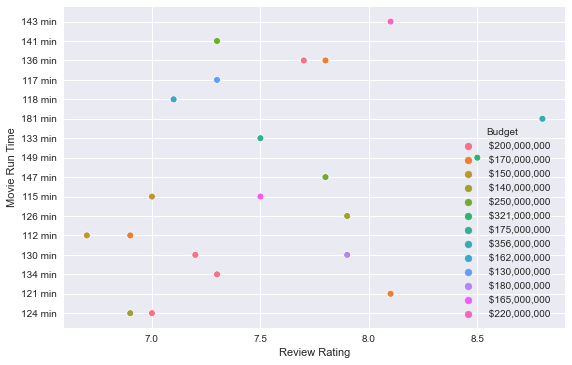

In [204]:
sns.scatterplot(x='Review Rating', y='Movie Run Time', hue= "Budget", data=df)
plt.show()

### Relationship Analysis

### Relationship between genres and popularity

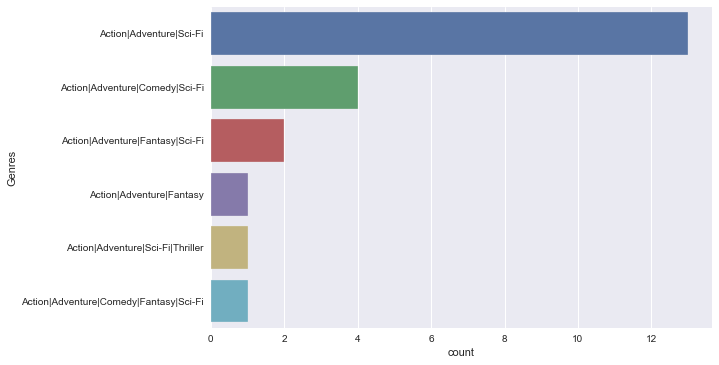

In [219]:
sns.countplot(y = 'Genres', data = df)
plt.show()

# Average rating

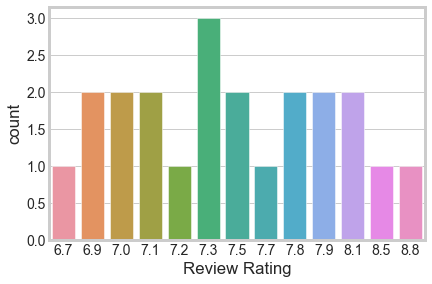

In [93]:
sns.countplot(x = 'Review Rating', data = df)
plt.show()